# <div style="text-align: center"> ANÁLISE DOS DADOS DOS PASSAGEIROS DO TINATIC</div>

<div style="text-align: right">Projeto deselvolvido por Nadson Brito Gondim</div>
<div style="text-align: right">para fins de aprovação no nanodegree</div>
<div style="text-align: right">"Fundamentos de Data Science I" da Udacity</div>

## INTRODUÇÃO

<div style="text-align: justify"> Neste projeto, é feita a análise dos dados contidos no arquivo "titanic-data-6.csv", concernente aos passageiros envolvidos no desastre do Titanic. Os dados estão divididos nas seguintes colunas, que, no arquivo, estão separadas por vírgula:</div>


- PassengerId
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

No site "https://www.kaggle.com/c/titanic/data" é mostrado o significado dessas colunas, expresso na seguinte tabela:


|VARIÁVEL        |DEFINIÇÃO                                 |CHAVE                                         |
|----------------|------------------------------------------|----------------------------------------------|
|Survived        |Sobrevivência                             |0 = Não, 1 = Sim                              |
|Pclass          |Classe do bilhete                         |1 = 1ª, 2 = 2ª, 3 = 3ª                        |
|Sex             |Sexo                                      |                                              |
|Age             |Idade em anos                             |                                              |
|SibSp           |Nº de irmãos/cônjuges a bordo do Titanic  |                                              |
|Parch           |Nº de pais/filhos a bordo do Titanic      |                                              |
|Ticket          |Número do bilhete                         |                                              |
|Fare            |Tarifa do passageiro                      |                                              |
|Cabin           |Número da cabine                          |                                              |
|Embarked        |Porto de embarcação                       |C = Cherburgo, Q = Queenstown, S = Southampton|

O site apresenta, ainda, as seguintes informações a respeito das variáveis envolvidas na análise:

```
pclass: Um índice do status socioeconômico
1st = Alto
2nd = Médio
3rd = Baixo

age: A idade é fracionária se menor que 1. Se a idade é aproximada, ela está na forma xx.5

sibsp: Este conjunto de dados define as relações familiares da seguinte forma...
Irmãos = irmão, irmã, meio-irmão, meia-irmã
Cônjuge = marido, mulher (amantes e noivos foram ignorados)

parch: Este conjunto de dados define as relações familiares da seguinte forma...
Pais = mãe, pai
Filhos = filha, filho, enteada, enteado
Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para elas.
```

## Fazendo questionamentos

<div style="text-align: justify">Observando as colunas da nossa tabela de dados, podemos perceber que o objetivo central de nossa análise deverá ser entender de que forma as características dos passaveiros do Titanic (dispostas nas diversas colunas) impactaram nas suas respectivas chances de sobrevivência.</div>
Visando atender a esse objetivo, elencamos os seguintes questionamentos:

- O número da classe dos passageiros impactou na possibilidade de sobrevivência de cada um?
- Qual sexo e qual faixa etária estão associados a um maior número de sobreviventes, em termos proporcionais?
- Comparando o número de irmãos/cônjuges e o número de pais/filhos dos passageiros, qual desses dois fatores interferiu mais significativamente nas chances dos passageiros de sobreviverem?
- Durante o desastre, quais fatores contribuiram diretamente para selecionar quais passageiros iriam ou não sobreviver?

São essas as perguntas que tentaremos responder ao longo desta análise.

## Preparando os dados

Vamos, inicialmente, abrir o conjunto de dados do nosso arquivo "titanic-data-6.csv", para poder examiná-los.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic-data-6.csv")
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<div style="text-align: justify">A célula acima mostra o cabeçalho e a linha referente ao primeiro passageiro da tabela. Pudemos verificar que o arquivo foi lido corretamente. Vamos agora avaliar os dados para tentar identificar algum problema relacionado à qualidade ou à estrutura do dataframe. Estas são algumas das perguntas que podemos fazer a respeito desses dois aspectos:</div>

- Qual o número de amostras do conjunto de dados?
- Qual o número de colunas do nosso conjunto de dados?
- Quais as colunas em que há valores faltantes?
- Quantas linhas possuem valores faltantes que podem comprometer os resultados de nossa análise?
- Há linhas duplicadas no conjunto de dados? Quais são elas?
- Quais os tipos de dados das colunas?
- Qual o número de valores únicos para as colunas "PassengerId"? Ele corresponde ao número de linhas do dataframe?
- Quais são os valores únicos das colunas "Survived", "Pclass", "Sex", "SibSp" e "Parch"?

Vamos agora tentar responder a cada uma dessas perguntas. O número de amostras e de colunas pode ser obtido da seguinte forma:

In [2]:
df.shape

(891, 12)

<div style="text-align: justify">Pelo que obvervamos, o nosso conjunto de dados contém 891 amostras e 12 colunas. Vamos então verificar quais colunas possuem valores faltantes.</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<div style="text-align: justify">Podemos observar que as colunas com valores faltantes são estas: "Age", "Cabin" e "Embarked". Dessas três, apenas na coluna "Age" a falta de valores pode representar um problema para a nossa análise, consoante a escolha das perguntas que inicialmente nos propusemos a responder. Queremos saber, então, quantas linhas possuem valores faltantes na coluna "Age".</div>

In [4]:
sum([True for item in pd.isna(df["Age"]) if item == True])

177

<div style="text-align: justify">Temos, dessa forma, 177 linhas em que está faltando a idade do passageiro. Posteriormente, estas linhas precisarão ser excluídas, para melhor análise da pergunta relacionada à faixa etária dos passageiros. Por hora, vamos apurar se há linhas duplicadas em nosso conjunto de dados. Faremos o seguinte:</div>

In [5]:
sum(df.duplicated())

0

Percebe-se que não há linhas duplicadas, o que facilita o nosso trabalho. A seguir, vamos verificar quais são os tipos de dados das nossas colunas.

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<div style="text-align: justify">Os tipos de dados do nosso dataframe estão todos corretos. O tipo float para a coluna "Age" parece ser necessário, tendo em vista a observação relativa a idades estimadas ou inferiores a 1 ano. Isso não trará qualquer prejuízo à nossa análise. Passemos à verificação da coluna "PassengerId". Queremos saber se o número de valores únicos nessa coluna corresponde ao número de amostras do nosso conjunto de dados.</div>

In [7]:
df["PassengerId"].nunique()

891

<div style="text-align: justify">Vemos que número de valores únicos da coluna "PassengerId" é exatamente o mesmo do número de amostras, o que significa que não há nenhum problema de ID repetido. Todos os IDs do nosso dataframe são únicos. Precisamos, agora, identificar quais são os valores únicos das colunas "Survived", "Pclass", "Sex", "SibSp" e "Parch".</div>

In [8]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [9]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [10]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [11]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [12]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

<div style="text-align: justify">Os valores únicos dessas colunas estão dentro do esperado, de modo que não há problemas a corrigir nesse sentido. Uma vez encontrados todos problemas na qualidade ou na estrutura dos nossos dados, faremos neste momento uma limpeza no dataframe a fim de deixá-lo com uma estrutura que facilite o nosso processo de análise. Iremos começar descartando as seguintes colunas, por serem irrelevantes para as perguntas inicialmente formuladas: "PassengerId", "Name", "Ticket", "Fare", "Cabin" e "Embarked".</div>

In [13]:
df.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0


<div style="text-align: justify">Criaremos, então, um novo dataframe ("df_age") no qual são descartadas as linhas em que está faltando o valor da idade do passageiro. Este novo dataframe será utilizado apenas para a análise da relação entre a faixa etária e a sobrevivência dos passageiros. A análise das demais perguntas será feita com o dataframe "df" que já vínhamos utilizando.</div>

In [14]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

177

In [15]:
df_age = df.drop([idx for idx,row in df.iterrows() if any(row.isnull())])

In [16]:
sum([True for idx,row in df_age.iterrows() if any(row.isnull())])

0

In [17]:
df_age.isnull().sum().any()

False

Encerramos a nossa limpeza do conjunto de dados. Por garantia, iremos salvas os nossos dataframes em novos arquivos ".csv".

In [18]:
df.to_csv('df_clean.csv', index=False)
df_age.to_csv('df_clean_age.csv', index=False)

## Explorando o conjunto de dados

Nesta etapa, buscaremos encontrar padrões nos nossos dados e entender as relações entre as diferentes características dos passageiros do Titanic e a sobrevivência ou não destes. Podemos começar plotando o histograma de todas as variáveis numéricas.

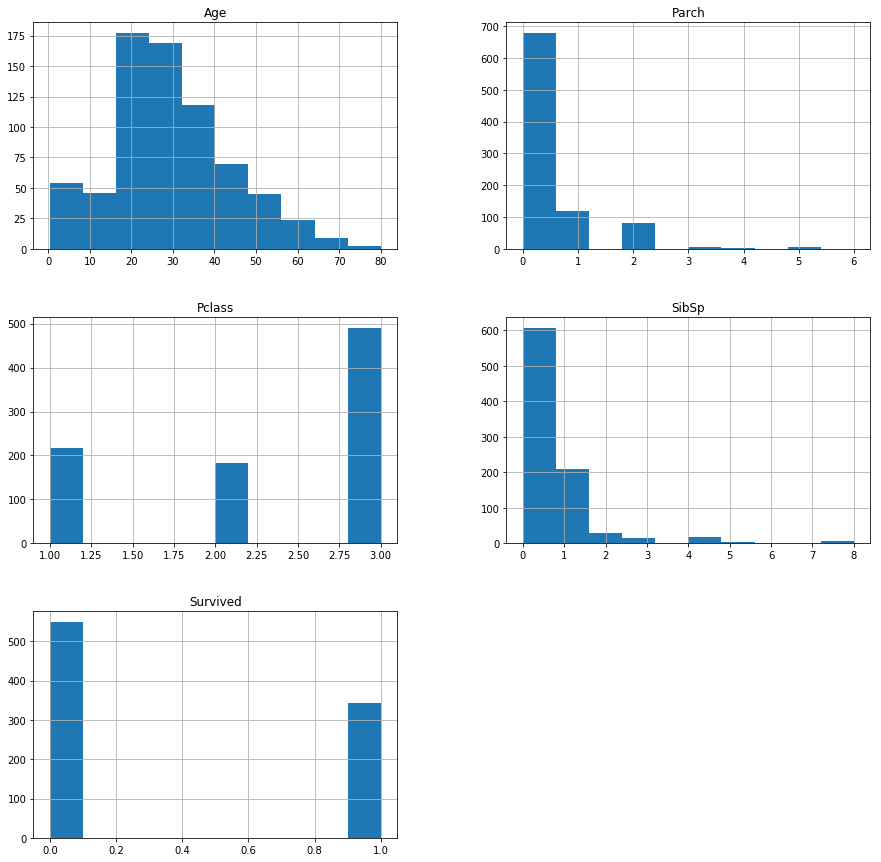

In [19]:
% matplotlib inline

df.hist(figsize=(15,15));

Por meio desses gráficos podemos visualizar a distribuição de cada uma dessas variáveis entre os passageiros do Titanic. Vemos, por exemplo, que os histogramas das variáveis "Age", "SibSp" e "Parch" estão distorcidos para a direita e que a grande maioria dos passageiros era de 3ª classe.

Embora seja possível entender a distribuição das classes entre os passageiros por meio do histograma, o ideal seria utilizar um gráfico de barras, pois os números na variável "Pclass" não representam quantidades, apenas simbolizam as respectivas classes. Faremos, então, o gráfico de barras para esta variável.

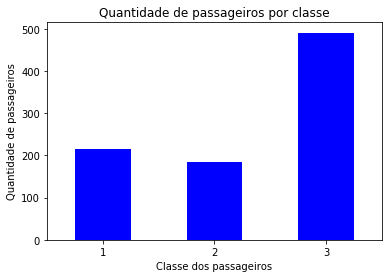

In [20]:
df["Pclass"].value_counts().sort_index().plot(kind="bar", color="b")
plt.title('Quantidade de passageiros por classe')
plt.xlabel('Classe dos passageiros')
plt.ylabel('Quantidade de passageiros')
plt.xticks(rotation='horizontal');

O mesmo raciocínio vale para a variável "Survived". Portanto, faremos também o respectivo gráfico de barras.

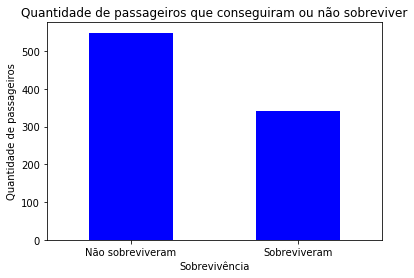

In [21]:
locations = [0, 1]
labels = ["Não sobreviveram", "Sobreviveram"]
df["Survived"].value_counts().plot(kind="bar", color="b")
plt.title('Quantidade de passageiros que conseguiram ou não sobreviver')
plt.xlabel('Sobrevivência')
plt.ylabel('Quantidade de passageiros')
plt.xticks(locations, labels, rotation='horizontal');

Infelizmente, pelo que pudemos perceber, a maioria dos passageiros a bordo do Titanic não sobreviveu. Podemos utilizar gráficos de barra para relacionar as diferentes variáveis às suas respectivas médias de sobrevivência. Vejamos como fica:

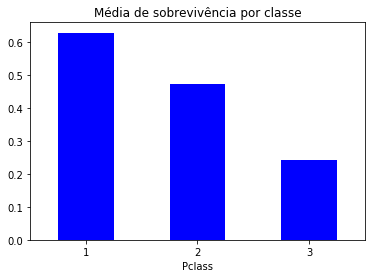

In [183]:
df.groupby("Pclass").mean()["Survived"].plot(kind="bar", color="b", title="Média de sobrevivência por classe")
plt.xticks(rotation="horizontal");

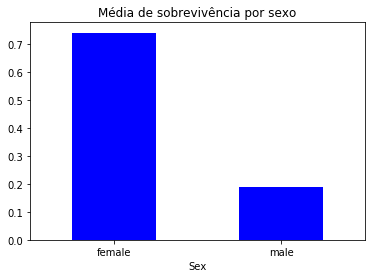

In [200]:
df.groupby("Sex").mean()["Survived"].plot(kind="bar", color="b", title="Média de sobrevivência por sexo")
plt.xticks(rotation="horizontal");

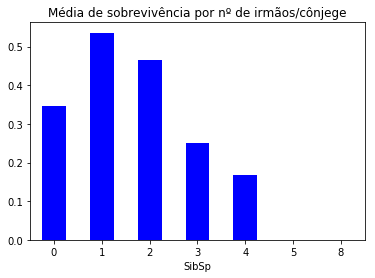

In [265]:
df.groupby("SibSp").mean()["Survived"].plot(kind="bar", color="b", title="Média de sobrevivência por nº de irmãos/cônjege")
plt.xticks(rotation="horizontal");

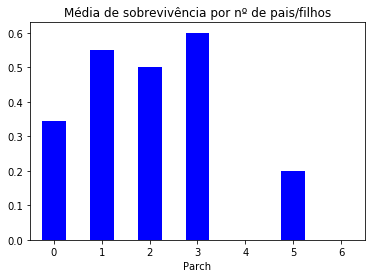

In [205]:
df.groupby("Parch").mean()["Survived"].plot(kind="bar", color="b", title="Média de sobrevivência por nº de pais/filhos")
plt.xticks(rotation="horizontal");

Quanto à variável idade, deixaremos para tratar dela mais a frente, por meio de faixas etátias, oportunidade em que criaremos o respectivo gráfico de barras das médias de sobrevivência. Analisando os quatro gráficos acima, vemos que a relação entre classe e sobrevivência é extritamente decrescente. O gráfico da variável sexo mostra que a média de sobrevivência é muito maior entre as mulheres do que entre os homens. O gráfico da variável "SibSp" começa crescente mais torna-se decrescente a partir do primeiro irmão ou cônjuge. O gráfico da variável "Parch", por sua vez, já não segue uma tendência muito bem definida, ele é ora crescente ora decrescente.

Passemos agora às conclusões.

## Tirando conclusões

Para tentar responder as questões inicialmente formuladas, iremos construir alguns gráficos relacionando a variável sobrevivência às demais variáveis. Comecemos por um gráfico de barras mostrando a quantidade total tanto de sobreviventes como não sobreviventes para cada classe de passageiros.

In [152]:
class_survive = df.groupby(["Survived", "Pclass"]).count()["Sex"].rename("")
print(class_survive)

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: , dtype: int64


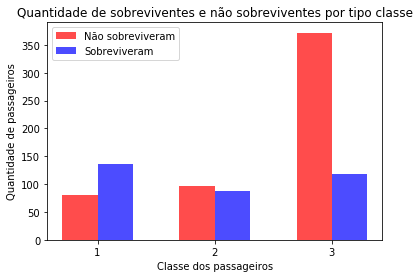

In [275]:
ind = np.arange(len(class_survive[0]))
width = 0.3
bars_dont_survived = plt.bar(ind, class_survive[0], width, color='r', alpha=.7, label='Não sobreviveram')
bars_survived = plt.bar(ind + width, class_survive[1], width, color='b', alpha=.7, label='Sobreviveram')

# título e rótulos
plt.ylabel('Quantidade de passageiros')
plt.xlabel('Classe dos passageiros')
plt.title('Quantidade de sobreviventes e não sobreviventes por tipo classe')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["1", "2", "3"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

Para analisar melhor a relação entre a classe do passageiro e sobrevivência ao desastre, devemos obervar como fica o gráfico de barras quando trabalhamos com proporções. Montemos o gráfico.

In [29]:
total_survived = df.groupby('Survived').count()['Sex']
print(total_survived)

Survived
0    549
1    342
Name: Sex, dtype: int64


In [149]:
prop_class_dont_survived = class_survive[0] / total_survived[0]
print(prop_class_dont_survived)

Pclass
1    0.145719
2    0.176685
3    0.677596
Name: Sex, dtype: float64


In [151]:
prop_class_survived = class_survive[1] / total_survived[1]
print(prop_class_survived)

Pclass
1    0.397661
2    0.254386
3    0.347953
Name: Sex, dtype: float64


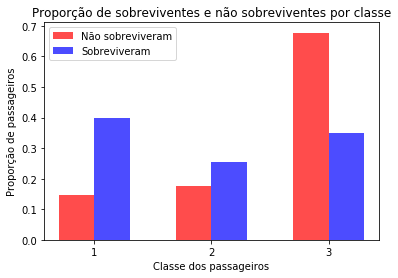

In [186]:
ind = np.arange(len(prop_class_survived))
width = 0.3
bars_dont_survived = plt.bar(ind, prop_class_dont_survived, width, color='r', alpha=.7, label='Não sobreviveram')
bars_survived = plt.bar(ind + width, prop_class_survived, width, color='b', alpha=.7, label='Sobreviveram')

# título e rótulos
plt.ylabel('Proporção de passageiros')
plt.xlabel('Classe dos passageiros')
plt.title('Proporção de sobreviventes e não sobreviventes por classe')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["1", "2", "3"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

Façamos também um grafico de pizza para cada uma das classes, que mostre o percentual de sobreviventres e não sobreviventes considerando somente os passageiros pertenceiros à respectiva classe do gráfico. Fica assim:

In [124]:
df.groupby(["Pclass", "Survived"]).count()["Sex"].rename("")

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: , dtype: int64

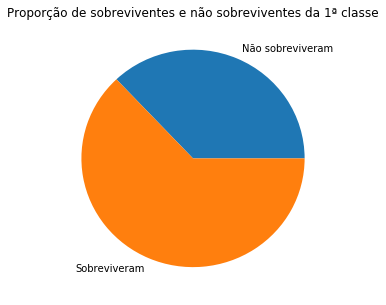

In [187]:
df.groupby(["Pclass", "Survived"]).count()["Sex"][1].rename("").plot(kind="pie", figsize=(5,5), 
          title="Proporção de sobreviventes e não sobreviventes da 1ª classe", labels=["Não sobreviveram", "Sobreviveram"]);

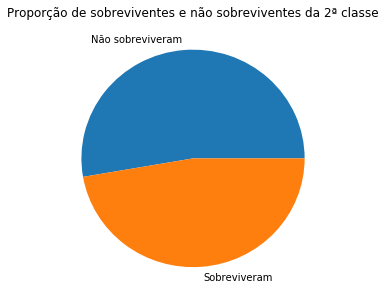

In [188]:
df.groupby(["Pclass", "Survived"]).count()["Sex"][2].rename("").plot(kind="pie", figsize=(5,5),
         title="Proporção de sobreviventes e não sobreviventes da 2ª classe", labels=["Não sobreviveram", "Sobreviveram"]);

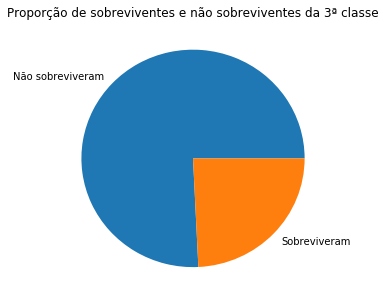

In [189]:
df.groupby(["Pclass", "Survived"]).count()["Sex"][3].rename("").plot(kind="pie", figsize=(5,5), y="classe",
        title="Proporção de sobreviventes e não sobreviventes da 3ª classe", labels=["Não sobreviveram", "Sobreviveram"]);

Devemos responder a primeira das perguntas formuladas: o número da classe dos passageiros impactou na possibilidade de sobrevivência de cada um?

<div style="text-align: justify">A partir desses gráficos, podemos concluir que entre os não sobreviventes, a imensa maioria é de 3ª classe. Concluimos também que, entre os sobreviventes a maioria é de 1ª classe, mas a diferença não é muito significativa em relação aos de 3ª classe, havendo uma distribuição mais equilibrada. Além do mais, é possível perceber que na 3º classe o número de não sobreviventes supera muito o número de sobreviventes. Por fim, uma curiosidade interessante seria que, ao compararmos os dois gráficos de barras (o com quantidades absolutas e o outro com percentuais), vemos que, embora, em termos absolutos, o número de não sobreviventes da 2ª classe seja maior que o de sobreviventes dessa mesma classe, se tomarmos um sobrevivente ao acaso, as chances de ele ser da 2ª classe supera as chances de que um não sobrevivente aleatório seja dessa classe.</div>

Portando, respondendo a primeira pergunta, entendemos que sim, os gráficos indicam que o número da classe impaactou negativamente na possbilidade de sobrevivência, o que pode ser percebido pelo gráfico decrescente das médias de sobrevivência em relação ao número da classe. Quanto maior a classe, menor eram as chances de sobreviver.

Iremos repetir o procedimento anterior, agora com relação à variável sexo, a fim de entendermos melhor a sua relação com a variável sobrevivência.

In [153]:
sex_survive = df.groupby(["Survived", "Sex"]).count()["Pclass"].rename("")
print(sex_survive)

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: , dtype: int64


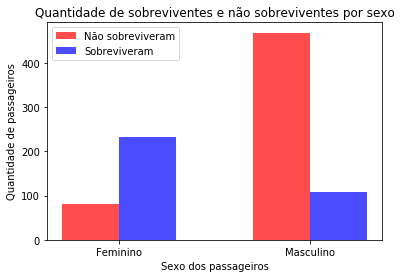

In [154]:
ind = np.arange(len(sex_survive[0]))
width = 0.3
bars_dont_survived = plt.bar(ind, sex_survive[0], width, color='r', alpha=.7, label='Não sobreviveram')
bars_survived = plt.bar(ind + width, sex_survive[1], width, color='b', alpha=.7, label='Sobreviveram')

# título e rótulos
plt.ylabel('Quantidade de passageiros')
plt.xlabel('Sexo dos passageiros')
plt.title('Quantidade de sobreviventes e não sobreviventes por sexo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["Feminino", "Masculino"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

In [249]:
prop_sex_dont_survived = sex_survive[0] / total_survived[0]
print(prop_sex_dont_survived)

Sex
female    0.147541
male      0.852459
Name: , dtype: float64


In [35]:
prop_sex_survived = sex_survive[1] / total_survived[1]
print(prop_sex_survived)

Sex
female    0.681287
male      0.318713
Name: Pclass, dtype: float64


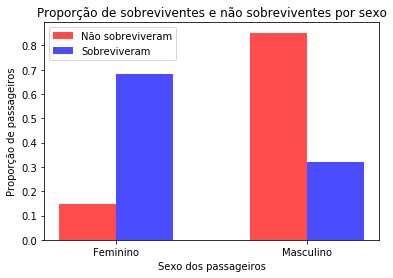

In [191]:
ind = np.arange(len(prop_sex_survived))
width = 0.3
bars_dont_survived = plt.bar(ind, prop_sex_dont_survived, width, color='r', alpha=.7, label='Não sobreviveram')
bars_survived = plt.bar(ind + width, prop_sex_survived, width, color='b', alpha=.7, label='Sobreviveram')

# título e rótulos
plt.ylabel('Proporção de passageiros')
plt.xlabel('Sexo dos passageiros')
plt.title('Proporção de sobreviventes e não sobreviventes por sexo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["Feminino", "Masculino"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

In [132]:
df.groupby(["Sex", "Survived"]).count()["Pclass"].rename("")

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: , dtype: int64

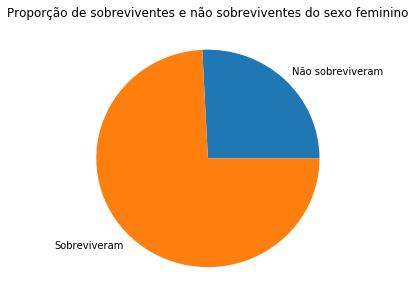

In [192]:
df.groupby(["Sex", "Survived"]).count()["Pclass"]["female"].rename("").plot(kind="pie", figsize=(5,5), 
     title="Proporção de sobreviventes e não sobreviventes do sexo feminino", labels=["Não sobreviveram", "Sobreviveram"]);

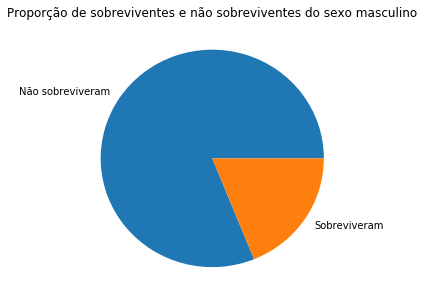

In [193]:
df.groupby(["Sex", "Survived"]).count()["Pclass"]["male"].rename("").plot(kind="pie", figsize=(5,5), 
     title="Proporção de sobreviventes e não sobreviventes do sexo masculino", labels=["Não sobreviveram", "Sobreviveram"]);

A conclusão a que chegamos a partir desses gráficos é de que a maioria dos sobreviventes são mulheres, enquanto que a maioria dos não sobreviventes são homens. Outra conclusão sugerida pelos gráficos é que a chance de sobrevivência das mulheres é muito maior do que a chance dos homens.

Vejamos, agora, como fica o gráfico da faixa etária com relação à variável sobrevivência. Para tanto, vamos dividir as idades dos passageiros nas seguintes faixas etárias:

- Criança: Idade menor do que 13 anos;
- Adolescente: Idade maior ou igual a 13 anos e menor do que 18 anos;
- Adulto: Idade maior ou igual a 18 anos e menor do que 60 anos;
- Idoso: Idade maior ou igual a 60 anos.

In [37]:
df_age["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
bin_edges = [0.42, 12.99, 17.99, 59.99, 80]
bin_names = ["child", "teenage", "adult", "oldman"]

In [41]:
df_age['AgeRange'] = pd.cut(df_age['Age'], bin_edges, labels=bin_names)
df_age.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeRange
0,0,3,male,22.0,1,0,adult


Antes de proceguirmos, vajamos como fica o gráfico de distribuição da faixa etária dos passageiros.

In [155]:
df_age.groupby("AgeRange").count()["Pclass"].rename("")

AgeRange
child       68
teenage     44
adult      575
oldman      26
Name: , dtype: int64

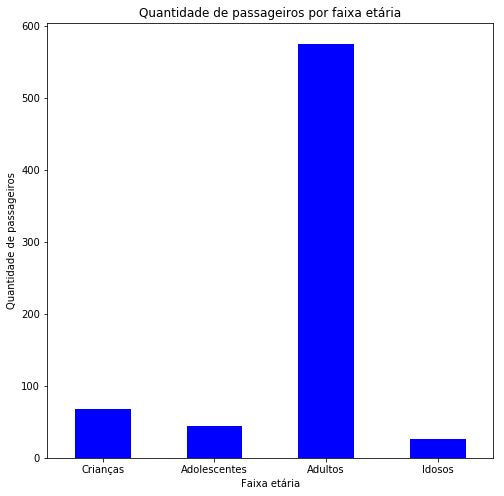

In [54]:
locations = [0, 1, 2, 3]
labels = ["Crianças", "Adolescentes", "Adultos", "Idosos"]
counts = df_age.groupby("AgeRange").count()["Pclass"]
counts.plot(kind="bar", color="b", figsize=(8,8))
plt.title("Quantidade de passageiros por faixa etária");
plt.xlabel('Faixa etária')
plt.ylabel('Quantidade de passageiros')
plt.xticks(locations, labels, rotation='horizontal');

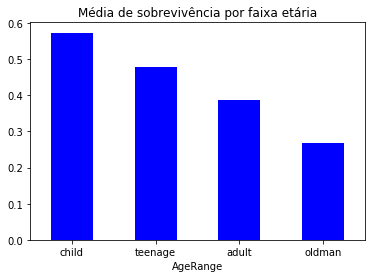

In [203]:
df_age.groupby("AgeRange").mean()["Survived"].plot(kind="bar", color="b", title="Média de sobrevivência por faixa etária")
plt.xticks(rotation="horizontal");

Agora, precisamos fazer os demais gráficos.

In [60]:
agerange_survive = df_age.groupby(["Survived", "AgeRange"]).count()["Pclass"]
print(agerange_survive)

Survived  AgeRange
0         child        29
          teenage      23
          adult       353
          oldman       19
1         child        39
          teenage      21
          adult       222
          oldman        7
Name: Pclass, dtype: int64


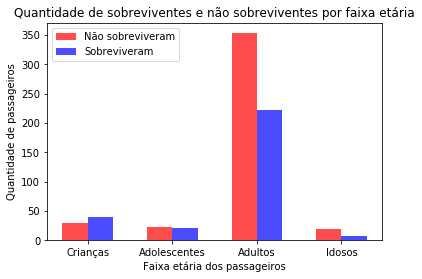

In [139]:
ind = np.arange(len(agerange_survive[0]))
width = 0.3
bars_dont_survived = plt.bar(ind, agerange_survive[0], width, color='r', alpha=.7, label='Não sobreviveram')
bars_survived = plt.bar(ind + width, agerange_survive[1], width, color='b', alpha=.7, label='Sobreviveram')

# título e rótulos
plt.ylabel('Quantidade de passageiros')
plt.xlabel('Faixa etária dos passageiros')
plt.title('Quantidade de sobreviventes e não sobreviventes por faixa etária')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["Crianças", "Adolescentes", "Adultos", "Idosos"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

In [61]:
prop_agerange_dont_survived = agerange_survive[0] / total_survived[0]
print(prop_agerange_dont_survived)

AgeRange
child      0.052823
teenage    0.041894
adult      0.642987
oldman     0.034608
Name: Pclass, dtype: float64


In [62]:
prop_agerange_survived = agerange_survive[1] / total_survived[1]
print(prop_agerange_survived)

AgeRange
child      0.114035
teenage    0.061404
adult      0.649123
oldman     0.020468
Name: Pclass, dtype: float64


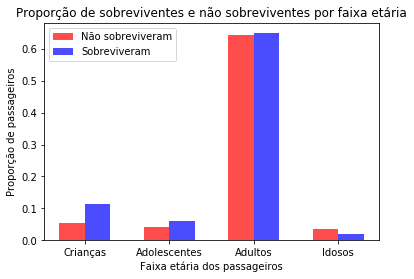

In [194]:
ind = np.arange(len(prop_agerange_survived))
width = 0.3
bars_dont_survived = plt.bar(ind, prop_agerange_dont_survived, width, color='r', alpha=.7, label='Não sobreviveram')
bars_survived = plt.bar(ind + width, prop_agerange_survived, width, color='b', alpha=.7, label='Sobreviveram')

# título e rótulos
plt.ylabel('Proporção de passageiros')
plt.xlabel('Faixa etária dos passageiros')
plt.title('Proporção de sobreviventes e não sobreviventes por faixa etária')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["Crianças", "Adolescentes", "Adultos", "Idosos"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

In [141]:
df_age.groupby(["AgeRange", "Survived"]).count()["Pclass"].rename("")

AgeRange  Survived
child     0            29
          1            39
teenage   0            23
          1            21
adult     0           353
          1           222
oldman    0            19
          1             7
Name: , dtype: int64

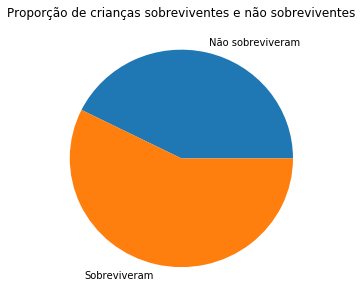

In [195]:
df_age.groupby(["AgeRange", "Survived"]).count()["Pclass"]["child"].rename("").plot(kind="pie", figsize=(5,5), 
     title="Proporção de crianças sobreviventes e não sobreviventes", labels=["Não sobreviveram", "Sobreviveram"]);

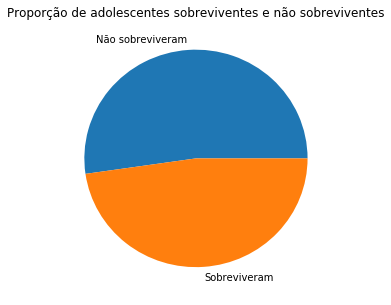

In [196]:
df_age.groupby(["AgeRange", "Survived"]).count()["Pclass"]["teenage"].rename("").plot(kind="pie", figsize=(5,5), 
     title="Proporção de adolescentes sobreviventes e não sobreviventes", labels=["Não sobreviveram", "Sobreviveram"]);

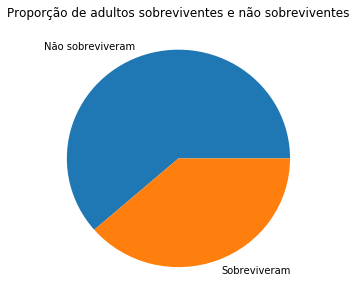

In [197]:
df_age.groupby(["AgeRange", "Survived"]).count()["Pclass"]["adult"].rename("").plot(kind="pie", figsize=(5,5), 
     title="Proporção de adultos sobreviventes e não sobreviventes", labels=["Não sobreviveram", "Sobreviveram"]);

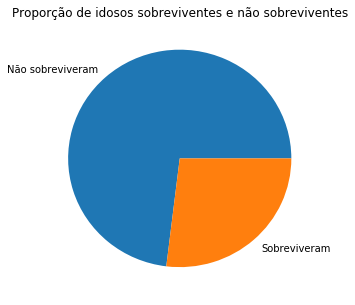

In [198]:
df_age.groupby(["AgeRange", "Survived"]).count()["Pclass"]["oldman"].rename("").plot(kind="pie", figsize=(5,5), 
     title="Proporção de idosos sobreviventes e não sobreviventes", labels=["Não sobreviveram", "Sobreviveram"]);

Pelos gráficos se verifica, tanto entre os sobreviventes como entre os não sobreviventes, a grande maioria era de formada por adultos e a minoria por idosos. A faixa etária dass crianças parece ser aquela que tem maior chance de sobrevivência, enquanto que a faixa dos idosos parece ter a menor chance de sobrevivência.

Assim, já temos condições de responder a segunda das perguntas inicialmente formuladas: qual sexo e qual faixa etária estão associados a um maior número de sobreviventes, em termos proporcionais? Os gráficos indicam que o maior número de sobreviventes está entre as mulheres e as crianças.

Agora analisemos a relação das variáveis "SibSb" e "Parch" com a variável "Survived". Montemos os gráficos:

In [208]:
sibsp_survive = df.groupby(["Survived", "SibSp"]).count()["Pclass"].rename("")
print(sibsp_survive)

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: , dtype: int64


In [209]:
parch_survive = df.groupby(["Survived", "Parch"]).count()["Pclass"].rename("")
print(parch_survive)

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: , dtype: int64


In [240]:
sibsp_surv = sibsp_survive[1].append(pd.Series([0], index=[5]))
parch_surv = parch_survive[1].append(pd.Series([0], index=[4]))

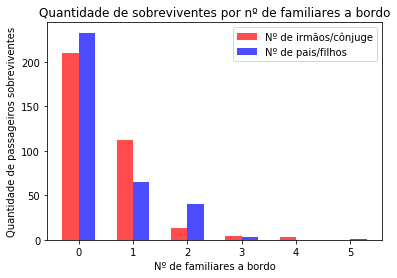

In [255]:
ind = np.arange(6)
width = 0.3
bars_sibsp_survived = plt.bar(ind, sibsp_surv, width, color='r', alpha=.7, label='Nº de irmãos/cônjuge')
bars_parch_survived = plt.bar(ind + width, parch_surv.sort_index(), width, color='b', alpha=.7, label='Nº de pais/filhos')

# título e rótulos
plt.ylabel('Quantidade de passageiros sobreviventes')
plt.xlabel('Nº de familiares a bordo')
plt.title('Quantidade de sobreviventes por nº de familiares a bordo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["0", "1", "2", "3", "4", "5"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

In [242]:
sibsp_dont_surv = sibsp_survive[0].append(pd.Series([0, 0], index=[6, 7]))
parch_dont_surv = parch_survive[0].append(pd.Series([0, 0], index=[7, 8]))

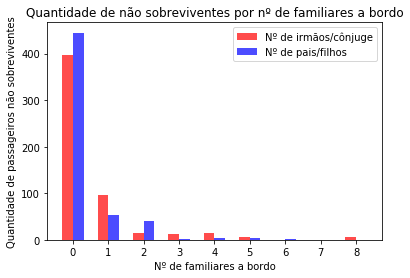

In [256]:
ind = np.arange(9)
width = 0.3
bars_sibsp_dont_survived = plt.bar(ind, sibsp_dont_surv.sort_index(), width, color='r', alpha=.7, label='Nº de irmãos/cônjuge')
bars_parch_dont_survived = plt.bar(ind + width, parch_dont_surv.sort_index(), width, color='b', alpha=.7,
                                                                                        label='Nº de pais/filhos')

# título e rótulos
plt.ylabel('Quantidade de passageiros não sobreviventes')
plt.xlabel('Nº de familiares a bordo')
plt.title('Quantidade de não sobreviventes por nº de familiares a bordo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

Vamos agora colocar esses dois gráficos acima em termos de proporção.

In [251]:
prop_sibsp_survived = sibsp_surv / total_survived[1]
print(prop_sibsp_survived)

0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
5    0.000000
dtype: float64


In [252]:
prop_parch_survived = parch_surv.sort_index() / total_survived[1]
print(prop_parch_survived)

0    0.681287
1    0.190058
2    0.116959
3    0.008772
4    0.000000
5    0.002924
dtype: float64


In [260]:
prop_sibsp_dont_survived = sibsp_dont_surv.sort_index() / total_survived[0]
print(prop_sibsp_dont_survived)

0    0.724954
1    0.176685
2    0.027322
3    0.021858
4    0.027322
5    0.009107
6    0.000000
7    0.000000
8    0.012750
dtype: float64


In [261]:
prop_parch_dont_survived = parch_dont_surv.sort_index() / total_survived[0]
print(prop_parch_dont_survived)

0    0.810565
1    0.096539
2    0.072860
3    0.003643
4    0.007286
5    0.007286
6    0.001821
7    0.000000
8    0.000000
dtype: float64


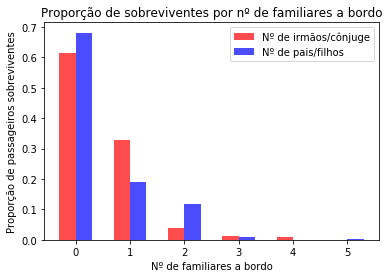

In [262]:
ind = np.arange(6)
width = 0.3
bars_sibsp_survived = plt.bar(ind, prop_sibsp_survived, width, color='r', alpha=.7, label='Nº de irmãos/cônjuge')
bars_parch_survived = plt.bar(ind + width, prop_parch_survived, width, color='b', alpha=.7, label='Nº de pais/filhos')

# título e rótulos
plt.ylabel('Proporção de passageiros sobreviventes')
plt.xlabel('Nº de familiares a bordo')
plt.title('Proporção de sobreviventes por nº de familiares a bordo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["0", "1", "2", "3", "4", "5"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

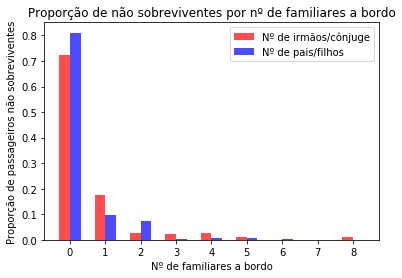

In [263]:
ind = np.arange(9)
width = 0.3
bars_sibsp_dont_survived = plt.bar(ind, prop_sibsp_dont_survived, width, color='r', alpha=.7, label='Nº de irmãos/cônjuge')
bars_parch_dont_survived = plt.bar(ind + width, prop_parch_dont_survived, width, color='b', alpha=.7,
                                                                                        label='Nº de pais/filhos')

# título e rótulos
plt.ylabel('Proporção de passageiros não sobreviventes')
plt.xlabel('Nº de familiares a bordo')
plt.title('Proporção de não sobreviventes por nº de familiares a bordo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

Seria interessante também criar um gráfico colocando lado a lado as médias de sobrevivência para as variáveis "Sibsp" e "Parch". Já fizemos esses gráficos na fase de exploração dos dados, vamos agora apenas juntá-los, para uma melhor visualização.

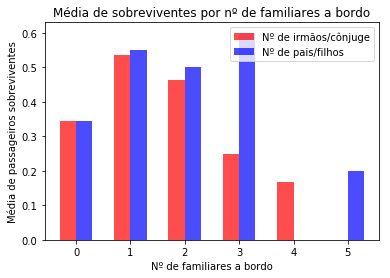

In [274]:
ind = np.arange(6)
width = 0.3
bars_sibsp_survived = plt.bar(ind, df.groupby("SibSp").mean()["Survived"][:6], width, color='r', alpha=.7, label='Nº de irmãos/cônjuge')
bars_parch_survived = plt.bar(ind + width, df.groupby("Parch").mean()["Survived"][:6], width, color='b', alpha=.7, label='Nº de pais/filhos')

# título e rótulos
plt.ylabel('Média de passageiros sobreviventes')
plt.xlabel('Nº de familiares a bordo')
plt.title('Média de sobreviventes por nº de familiares a bordo')
locations = ind + width / 2  # localização dos marcadores no eixo x
labels = ["0", "1", "2", "3", "4", "5"]  # rótulos dos marcadores no eixo x
plt.xticks(locations, labels, rotation='horizontal')

# legenda
plt.legend();

Podemos, agora, responder a terceira pergunta: Comparando o número de irmãos/cônjuges e o número de pais/filhos dos passageiros, qual desses dois fatores interferiu mais significativamente nas chances dos passageiros de sobreviverem? A melhor maneira de responder a essa pergunta parece ser recorrer a esta última tabela, com as meédias comparadas dos dois grupos. Por esse gráfico é possível perceber que, em geral, a média de sobrevivência é maior para aqueles que tem mais pais/filhos a bordo do que irmãos/cônjuge a bordo. 

Agora que analisamos todas as variáveis, estamos aptos a responder a quarta e última pergunta: durante o desastre, quais fatores contribuiram diretamente para selecionar quais passageiros iriam ou não sobreviver?

Dos fatores que analisamos (classe, sexo, idade, número de irmãos/cônjuge e número de pais/filhos) podemos concluir que todos eles tiveram algum impacto sobre a sobrevivência dos passageios, embora em graus diferentes. Alguns fatores, como a classe, o sexo e a idade, parecem ter um direcionamento mais claro sobre o tipo de influência de exerceram na questão da sobrevivência, sendo que os grupos de passageiros mais favorecidos foram os das mulheres, crianças e de 1ª classe e os menos favorecidos foram os homens, idosos e de 3ª classe. Com relação ao número de irmãos/cônjuge e de pais/filhos, ainda que este tenha também influenciado as chances de sobrevivência, não foi seguida uma tendência unidirecional.

Cumpre destacar que as conclusões aqui encontradas não são definitivas, mas apenas indícios a respeito das propabilidades de sobrevivência.